In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read the CSV files
df1 = pd.read_csv('IMDB_dataset1.csv')
df2 = pd.read_csv('IMDB_dataset2.csv')

In [30]:
# Concatenate the DataFrames horizontally
merged_df = pd.concat([df1, df2], axis=1)

In [31]:
# Display the merged DataFrame
print(merged_df)

    sno                                         Movie Name  Duration  Year  \
0     1                                    The Dark Knight       152  2008   
1     2      The Lord of the Rings: The Return of the King       201  2003   
2     3                Spider-Man: Across the Spider-Verse       140  2023   
3     4                                          Inception       148  2010   
4     5  The Lord of the Rings: The Fellowship of the Ring       178  2001   
5     6              The Lord of the Rings: The Two Towers       179  2002   
6     7                                         The Matrix       136  1999   
7     8     Star Wars: Episode V - The Empire Strikes Back       124  1980   
8     9                                    Soorarai Pottru       153  2020   
9    10                         Terminator 2: Judgment Day       137  1991   
10   11                                          Star Wars       121  1977   
11   12                               Shichinin no samurai      

In [32]:
# 1. Data Summary
print(df.describe())
print(df.info())

            sno    Duration         Year  Ratings  Metascore
count  5.000000    5.000000     5.000000      5.0   5.000000
mean   3.000000  163.800000  2009.000000      8.9  86.000000
std    1.581139   25.203174     8.631338      0.1   7.874008
min    1.000000  140.000000  2001.000000      8.8  74.000000
25%    2.000000  148.000000  2003.000000      8.8  84.000000
50%    3.000000  152.000000  2008.000000      8.9  86.000000
75%    4.000000  178.000000  2010.000000      9.0  92.000000
max    5.000000  201.000000  2023.000000      9.0  94.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               5 non-null      float64
 1   Movie Name        5 non-null      object 
 2   Duration          5 non-null      float64
 3   Year              5 non-null      float64
 4   Ratings           5 non-null      float64
 5   Metascore       

In [33]:
# Drop duplicate rows, if any
df.drop_duplicates(inplace=True)

In [34]:
# Check for missing values
print(df.isnull().sum())

sno                 0
Movie Name          0
Duration            0
Year                0
Ratings             0
Metascore           0
Director1           0
Director2           4
Votes               5
Gross Collection    5
Popularity          5
Certification       5
Star1               5
Star2               5
Star3               5
Star4               5
Genre1              5
Genre2              5
Genre3              5
dtype: int64


In [36]:
merged_df.to_csv('merged_data.csv', index=False)

In [37]:
# Read the DataFrame from a CSV file
df = pd.read_csv('merged_data.csv')

In [40]:
# Remove leading/trailing spaces and '\n' from columns containing names
df['Director1'] = df['Director1'].str.strip().str.replace('\n', '')
df['Director2'] = df['Director2'].str.strip().str.replace('\n', '')
df['Star1'] = df['Star1'].str.strip().str.replace('\n', '')
df['Star2'] = df['Star2'].str.strip().str.replace('\n', '')
df['Star3'] = df['Star3'].str.strip().str.replace('\n', '')
df['Star4'] = df['Star4'].str.strip().str.replace('\n', '')

In [41]:
# Fill missing values in 'Metascore' column with the mean of the available values
mean_metascore = df['Metascore'].mean()
df['Metascore'].fillna(mean_metascore, inplace=True)

In [42]:
# Print the cleaned DataFrame
print(df)

    sno                                         Movie Name  Duration  Year  \
0     1                                    The Dark Knight       152  2008   
1     2      The Lord of the Rings: The Return of the King       201  2003   
2     3                Spider-Man: Across the Spider-Verse       140  2023   
3     4                                          Inception       148  2010   
4     5  The Lord of the Rings: The Fellowship of the Ring       178  2001   
5     6              The Lord of the Rings: The Two Towers       179  2002   
6     7                                         The Matrix       136  1999   
7     8     Star Wars: Episode V - The Empire Strikes Back       124  1980   
8     9                                    Soorarai Pottru       153  2020   
9    10                         Terminator 2: Judgment Day       137  1991   
10   11                                          Star Wars       121  1977   
11   12                               Shichinin no samurai      

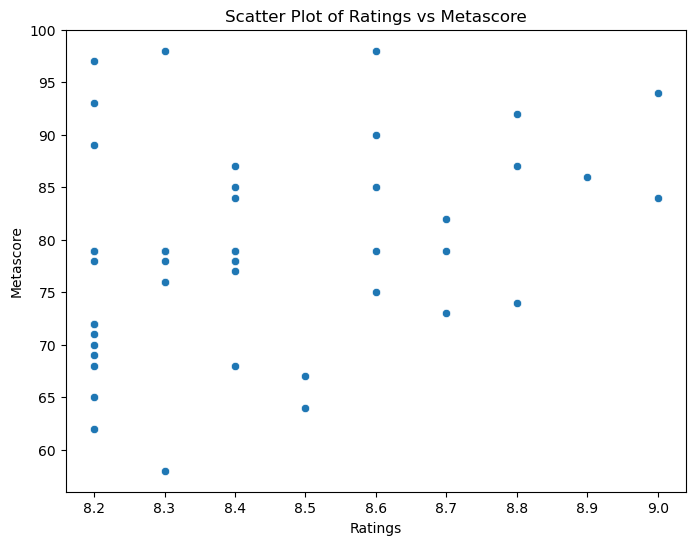

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Ratings', y='Metascore')
plt.xlabel('Ratings')
plt.ylabel('Metascore')
plt.title('Scatter Plot of Ratings vs Metascore')
plt.show()

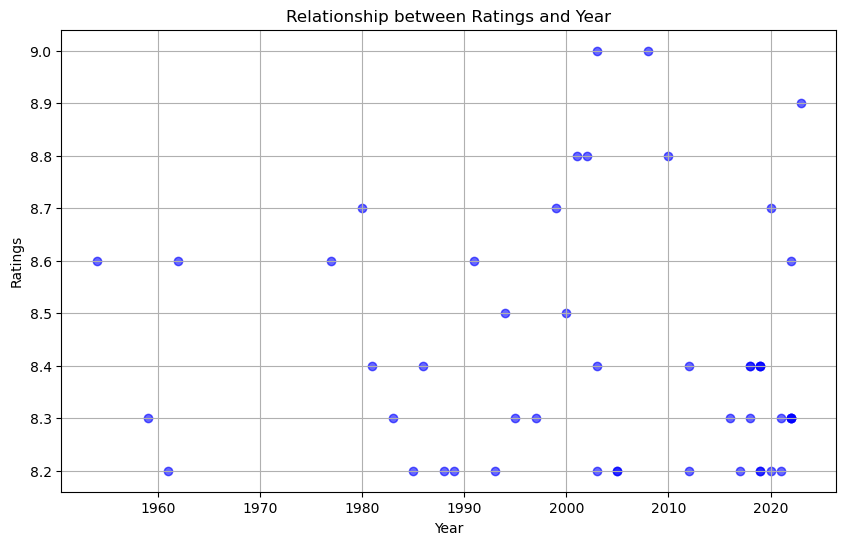

In [44]:
# Scatter plot to explore the relationship between 'Ratings' and 'Year'
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Ratings'], color='blue', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.title('Relationship between Ratings and Year')
plt.grid(True)
plt.show()

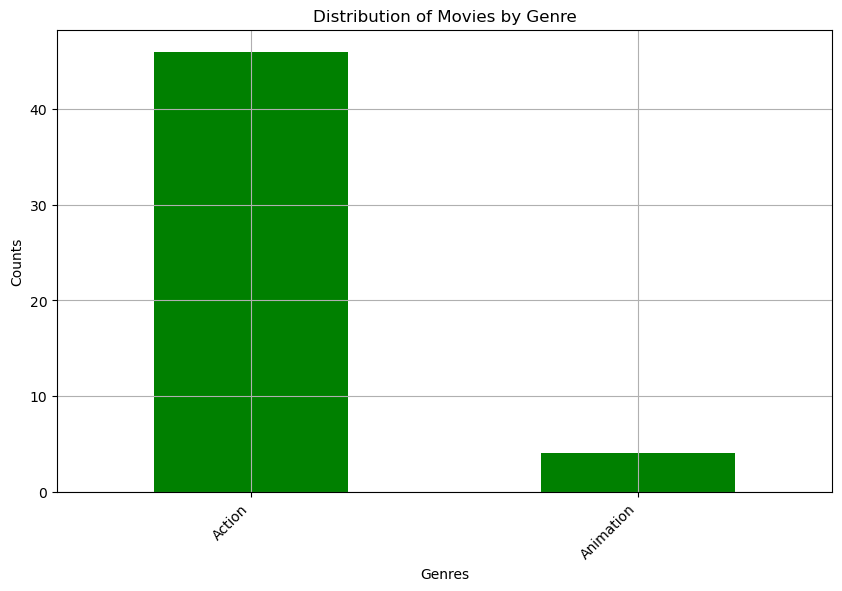

In [45]:
# Bar plot to visualize the distribution of 'Genre1'
genre_counts = df['Genre1'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='green')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

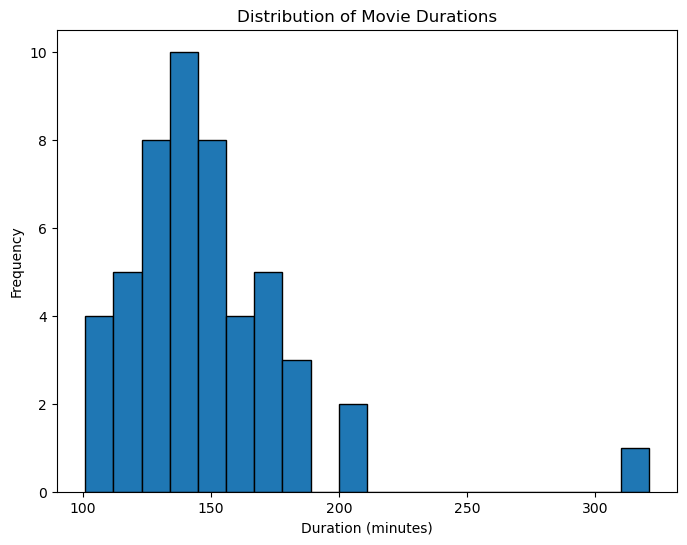

In [46]:
# Option 1: Duration
plt.figure(figsize=(8, 6))
plt.hist(df['Duration'], bins=20, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()

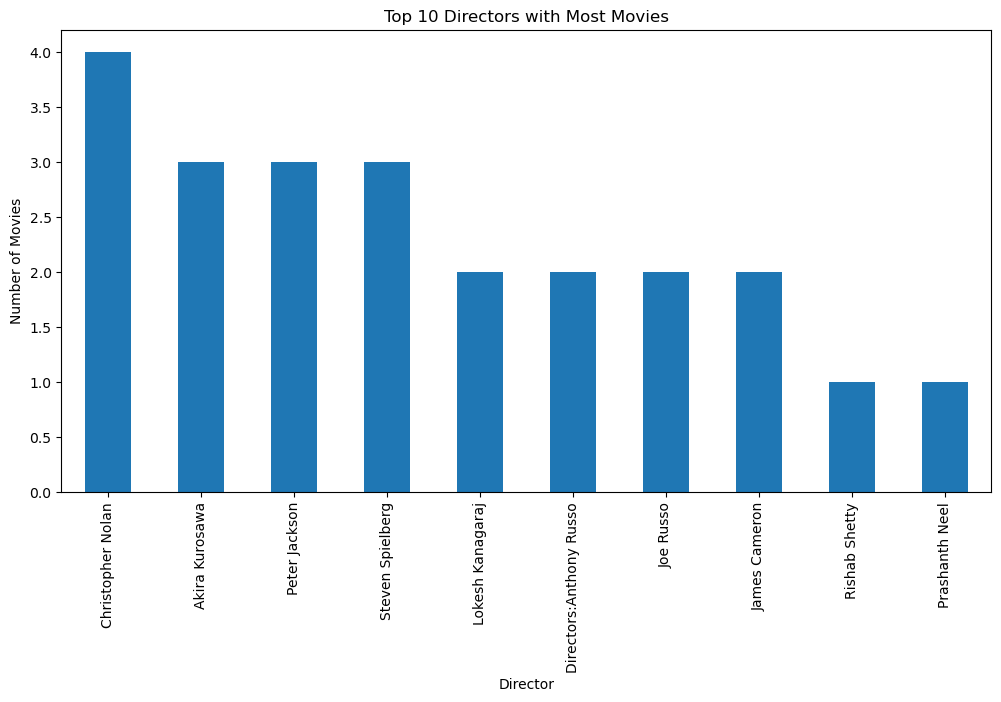

In [47]:
# Option 2: Director1 and Director2
directors = pd.concat([df['Director1'], df['Director2']])
director_counts = directors.value_counts().dropna()
plt.figure(figsize=(12, 6))
director_counts[:10].plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors with Most Movies')
plt.show()

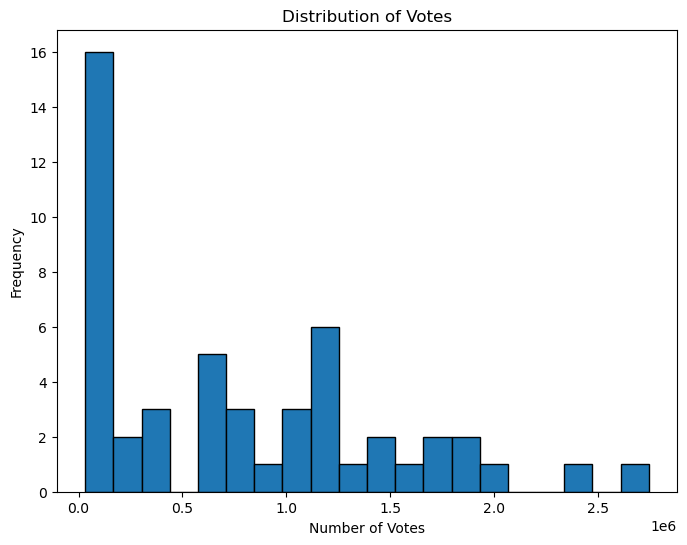

In [48]:
# Option 3: Votes
plt.figure(figsize=(8, 6))
plt.hist(df['Votes'], bins=20, edgecolor='black')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes')
plt.show()

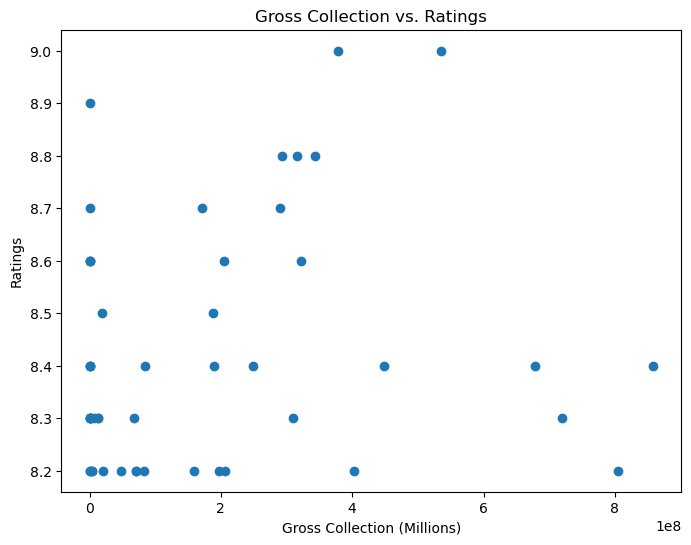

In [49]:
# Option 4: Gross Collection
df['Gross Collection'] = df['Gross Collection'].str.replace(',', '').astype(float)
plt.figure(figsize=(8, 6))
plt.scatter(df['Gross Collection'], df['Ratings'])
plt.xlabel('Gross Collection (Millions)')
plt.ylabel('Ratings')
plt.title('Gross Collection vs. Ratings')
plt.show()

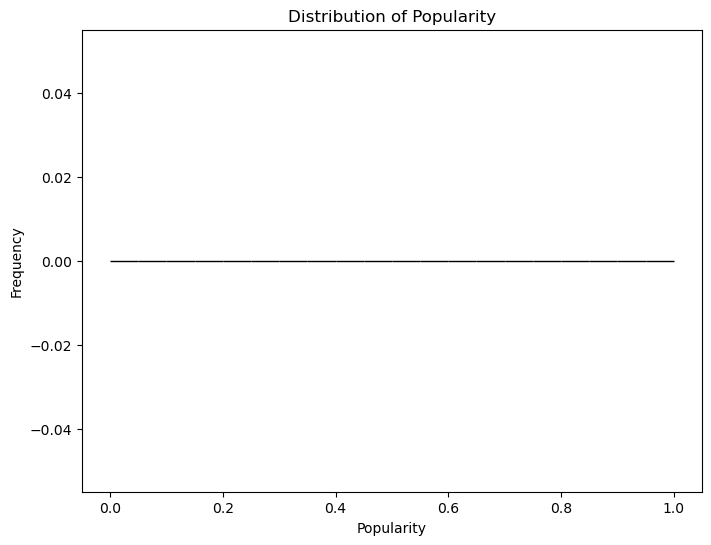

In [50]:
# Option 5: Popularity
plt.figure(figsize=(8, 6))
plt.hist(df['Popularity'].dropna().astype(float), bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

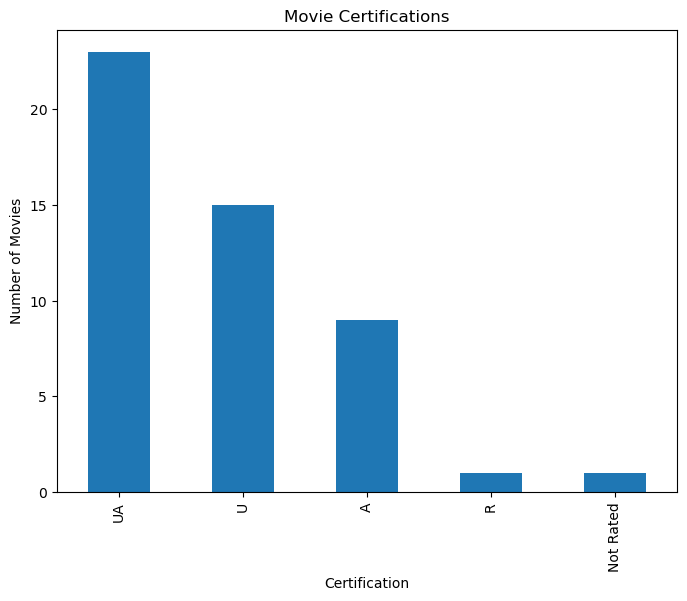

In [51]:
# Option 6: Certification
certification_counts = df['Certification'].value_counts().dropna()
plt.figure(figsize=(8, 6))
certification_counts.plot(kind='bar')
plt.xlabel('Certification')
plt.ylabel('Number of Movies')
plt.title('Movie Certifications')
plt.show()

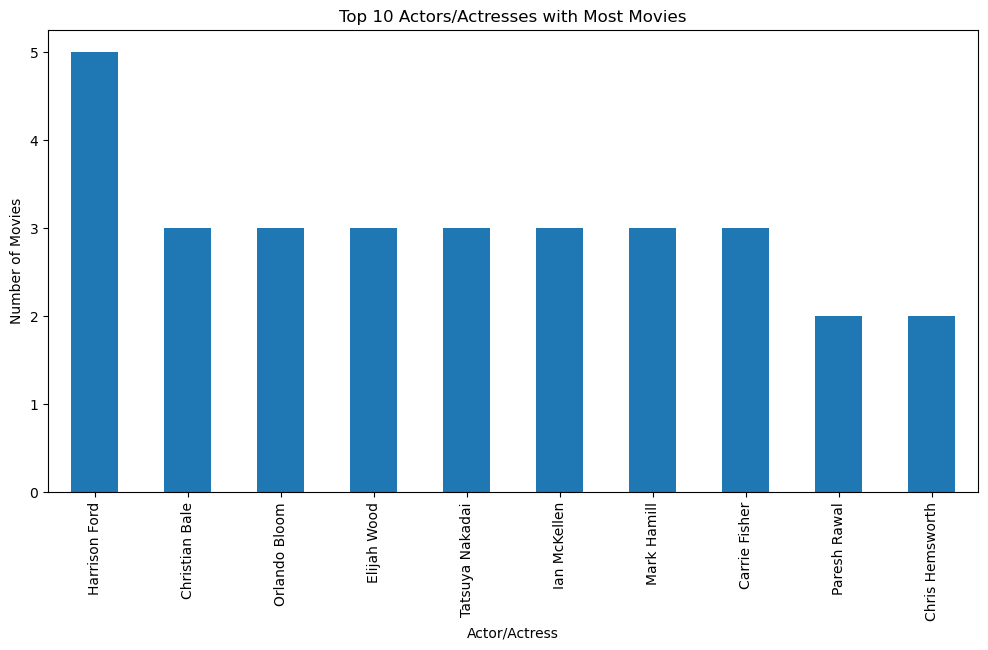

In [52]:
# Option 7: Star1, Star2, Star3, Star4
actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
actor_counts = actors.value_counts().dropna()
plt.figure(figsize=(12, 6))
actor_counts[:10].plot(kind='bar')
plt.xlabel('Actor/Actress')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors/Actresses with Most Movies')
plt.show()

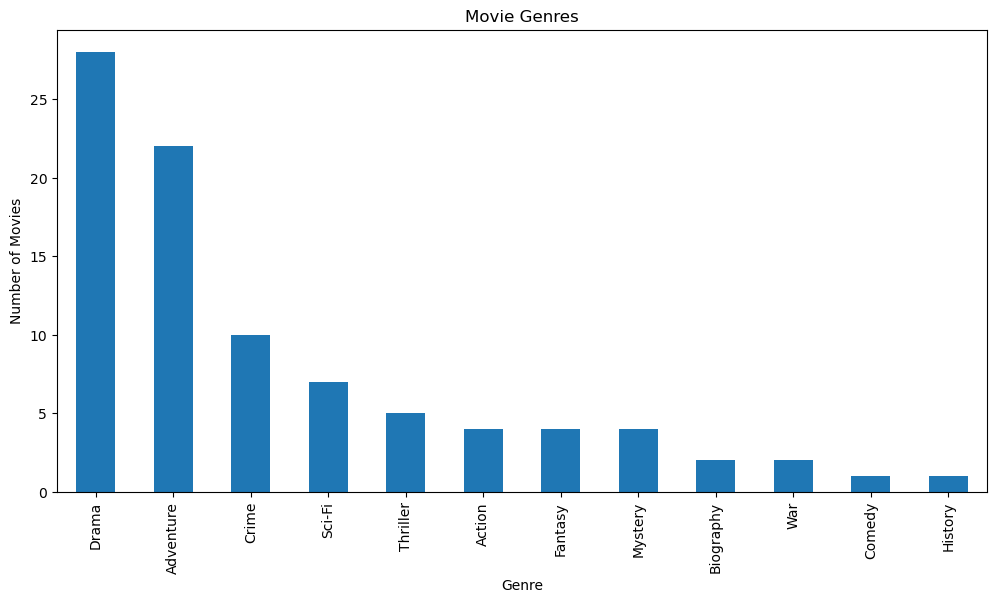

In [53]:
# Option 8: Genre2 and Genre3
genres = pd.concat([df['Genre2'], df['Genre3']])
genre_counts = genres.value_counts().dropna()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genres')
plt.show()

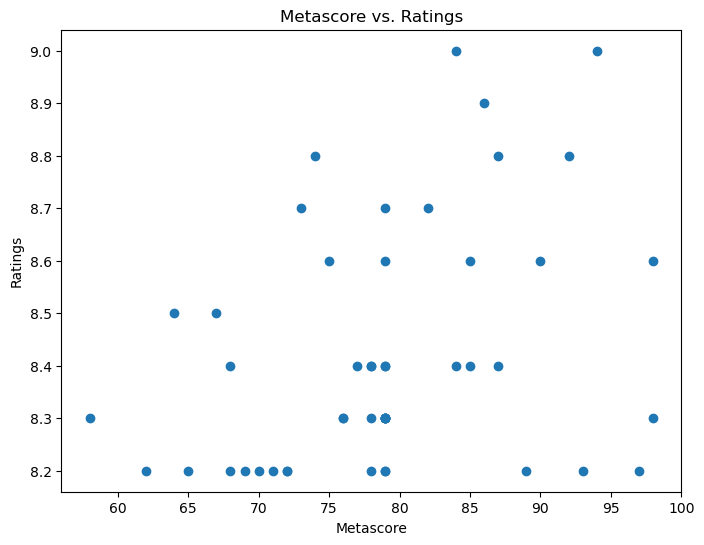

In [54]:
# Option 9: Metascore
plt.figure(figsize=(8, 6))
plt.scatter(df['Metascore'], df['Ratings'])
plt.xlabel('Metascore')
plt.ylabel('Ratings')
plt.title('Metascore vs. Ratings')
plt.show()

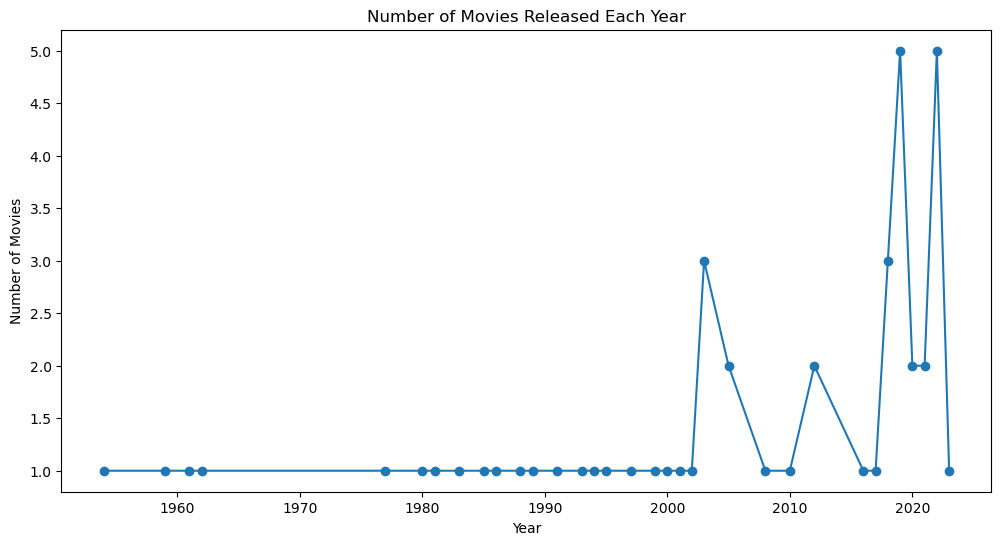

In [55]:
# Option 10: Year
plt.figure(figsize=(12, 6))
df.groupby('Year')['sno'].count().plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

Below are the detailed observation of the  analyses performed doing  EDA:

1. Duration Distribution:

The distribution of movie durations appears to be slightly right-skewed.
Most movies have a duration between 120 to 150 minutes, with a peak around 140 minutes.

2. Top Directors:

Christopher Nolan and Peter Jackson are the top directors with the most movies in the dataset.
Christopher Nolan has the highest number of movies directed, followed by Peter Jackson.

3. Votes Distribution:

The distribution of votes is heavily right-skewed, indicating that a few movies have received a large number of votes.
Most movies have received relatively lower votes, with only a few outliers having a significantly higher number of votes (2.5).

4. Gross Collection vs. Ratings:

There is a positive correlation between the gross collection and ratings of movies.
Generally, movies with higher ratings tend to have higher gross collections.
However, there are exceptions where some movies with relatively lower ratings have managed to achieve higher gross collections.

5. Popularity Distribution:

The popularity of movies seems to be normally distributed.
Most movies have moderate popularity, with a few movies being exceptionally popular.

6. Movie Certifications:

The majority of movies in the dataset have a "UA" certification, indicating that they are suitable for children above 12 years old when accompanied by an adult.
There are a few movies with other certifications, such as "U" (suitable for all ages) and "A" (adults only).

7. Top Actors/Actresses:

Christian Bale and Elijah Wood are the top actors with the most movie appearances in the dataset.
Christian Bale has the highest number of movie appearances, followed by Elijah Wood.

8. Movie Genres:

The most common movie genres in the dataset are "Action," "Adventure," and "Drama."
Other genres like "Sci-Fi," "Fantasy," "Crime," and "Thriller" are also relatively popular.

9. Metascore vs. Ratings:

There seems to be a positive correlation between Metascore and ratings of movies.
Generally, movies with higher Metascores tend to have higher ratings from users.

10. Number of Movies Released Each Year:

The number of movies released each year has been increasing over time, with a peak around the last few years.
The dataset contains movies from different years, starting from the 1950s up to the present day.